## PREDICTING SEPSIS DISEASE: Using Machine Learning API

## **1. Business Understanding**
In the context of healthcare analytics, our dataset focuses on patients within an Intensive Care Unit (ICU), with a specific emphasis on factors associated with the development of sepsis. Sepsis is a critical medical condition characterized by a systemic inflammatory response to infection, potentially leading to organ dysfunction and failure, and it is regarded as a medical emergency.

  #### **Dataset Overview:**
The dataset comprises essential medical attributes, including:
- **ID (Patient ID)**: Unique identifier assigned to each patient.
- **PRG (Plasma Glucose)**: Represents the level of glucose in the patient's plasma.
- **PL (Blood Work Result-1)**: First blood work result, measured in mu U/ml.
- **PR (Blood Pressure)**: Represents the patient's blood pressure in mm Hg.
- **SK (Blood Work Result-2)**: Second blood work result, measured in mm.
- **TS (Blood Work Result-3)**: Third blood work result, measured in mu U/ml.
- **M11 (Body Mass Index)**: Calculated body mass index (BMI) using weight in kg and height in meters.
- **BD2 (Blood Work Result-4)**: Fourth blood work result, measured in mu U/ml.
- **Age**: Represents the age of the patient in years.
- **Insurance**: Indicates whether the patient holds a valid insurance card.
- **Sepsis (Target)**: The target variable indicating whether a patient in the ICU will develop sepsis (Positive) or not (Negative).

### **Business Objective:**
Our primary goal is to glean actionable insights from this data to enhance our understanding of sepsis risk factors. By leveraging advanced analytics and potentially developing predictive models, we aim to facilitate early detection and intervention strategies. This, in turn, could significantly improve patient outcomes in the ICU setting, aligning with the broader healthcare objective of providing timely and targeted care to those at risk of sepsis.


### Formulating Hypothesis and Business Questions

#### **Hypothesis**
- **Null Hypothesis (H0)**: Age does not significantly impact the susceptibility to sepsis in ICU patients.
- **Alternative Hypothesis (H1)**: Older patients are more susceptible to sepsis in the ICU compared to younger individuals.

#### **Business Questions**:
**Univariate Analysis**

1. How many patients tested positive  vs Negative to Sepsis

**Bivariate Analysis:**

2. Is there a significant correlation between patients' age and the plasma glucose levels (PRG) with patients that tested positive to Sepssis?

3. What is the association between blood pressure (PR) and the risk of developing sepsis in ICU patients? Are there specific blood pressure ranges that are more commonly observed in patients who develop sepsis?

4. Does the body mass index (BMI) of ICU patients show any significant correlation with specific blood work results, such as plasma glucose (PRG) or blood work result-4 (BD2)?

**Multivariate Analysis**

5. How do age, plasma glucose levels (PRG), and blood pressure (PR) collectively contribute to the prediction of sepsis outcomes in ICU patients? Are there interactive effects between these variables?
6. Are there discernible patterns in the dataset that involve a combination of attributes such as age, insurance status, and specific blood work results, providing insights into potential risk factors for sepsis in ICU patients?


## **2. Data Understanding**

##### I. Importation

In [5]:
#Importing data exploration/Visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 




##### II. Load Datasets

In [6]:
# Loading Train and Test Data
train =pd.read_csv(r'C:\Users\marth\OneDrive - Azubi Africa\Sprints\LP6\Azubi-Africa-P6-Machine-Learning-API-using-FastAPI\Datatasets\Train.csv')
test = pd.read_csv(r'C:\Users\marth\OneDrive - Azubi Africa\Sprints\LP6\Azubi-Africa-P6-Machine-Learning-API-using-FastAPI\Datatasets\Test.csv')

In [7]:
#Preview of train data
train.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


In [8]:
#Preview of test data
test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


III. EDA ANALYSIS

In [11]:
#checking for missing values in both train and test data
train.isnull().sum(), test.isnull().sum()

(ID           0
 PRG          0
 PL           0
 PR           0
 SK           0
 TS           0
 M11          0
 BD2          0
 Age          0
 Insurance    0
 Sepssis      0
 dtype: int64,
 ID           0
 PRG          0
 PL           0
 PR           0
 SK           0
 TS           0
 M11          0
 BD2          0
 Age          0
 Insurance    0
 dtype: int64)

In [15]:
#checking for duplicates
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

In [16]:
#Statistical analysis
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


The TS attribute has highest max units compared to the rest of the attributes. There is a possibility of outliers which will be detected on EDA visualization 

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


2 of attributes are objects i.e ID and Sepssis and the rest others are numerical.

array([[<Axes: title={'center': 'PRG'}>, <Axes: title={'center': 'PL'}>,
        <Axes: title={'center': 'PR'}>],
       [<Axes: title={'center': 'SK'}>, <Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'M11'}>],
       [<Axes: title={'center': 'BD2'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Insurance'}>]], dtype=object)

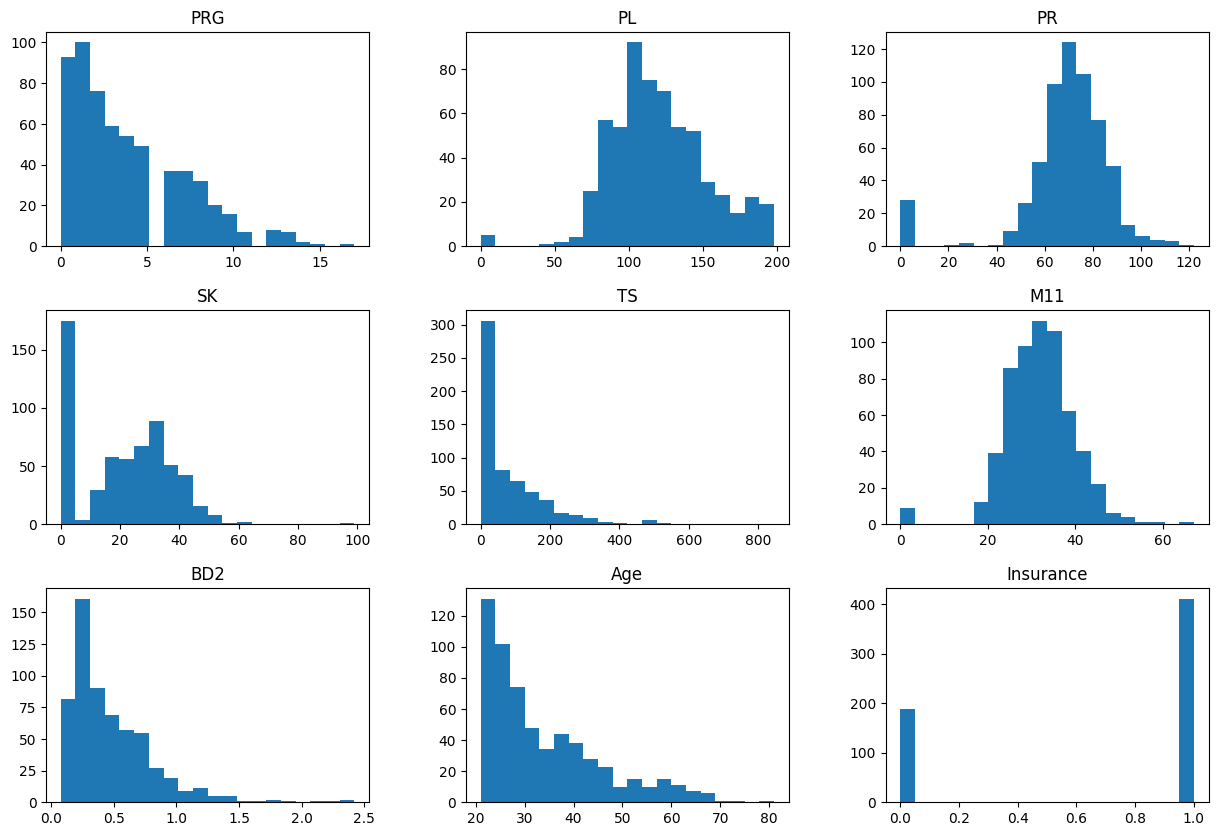

In [25]:
#visualizing the distribution of the numerical attributes
train.hist(bins = 20,figsize=(15, 10), layout=(3, 3), grid= False)

- Most of the attributes are Skewed to the Right (Positively Skewed): The right tail is longer or fatter than the left, indicating a concentration of data on the left side. These are PRG,SK,BD2,Age and TS.
- They assume a bell curve but not a bell curved distribution.

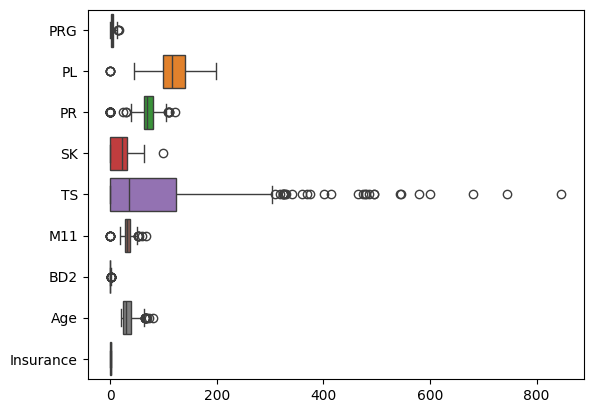

<Figure size 1000x1200 with 0 Axes>

In [32]:
#using the box plot to visualize for presence of outliers
sns.boxplot(data = train, orient= 'h')
plt.figure(figsize=(10,12))
plt.show()

There is presence of outliers in the dataset. TS attribute has far most outliers compared to other attributes. The attributes however are on different scales.

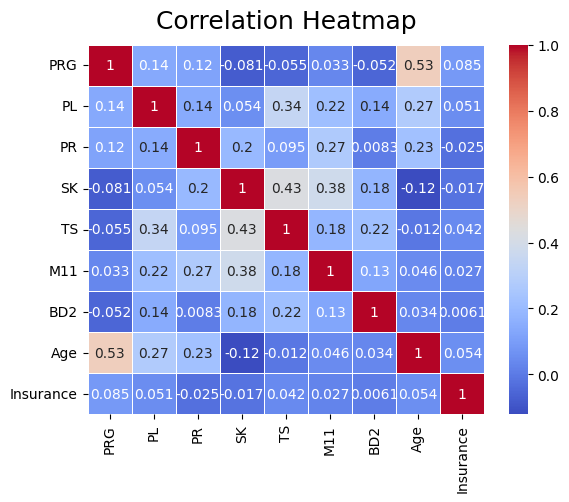

In [37]:
#Using a heatmap to show correlation of the attributes
#Filtering only numerical attributes
numeric_train = train.select_dtypes(include='number')
corr = numeric_train.corr()
heatmap =sns.heatmap(corr,annot = True, cmap = 'coolwarm',linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

There is weak correlation among the attributes. However the age and plasma glucose(PRG) has strong correlation of 0.53.

**ANSWERING THE BUSINESS QUESTIONS**

Univariate Analysis

**1. How many patients tested positive  vs Negative to Sepsis**

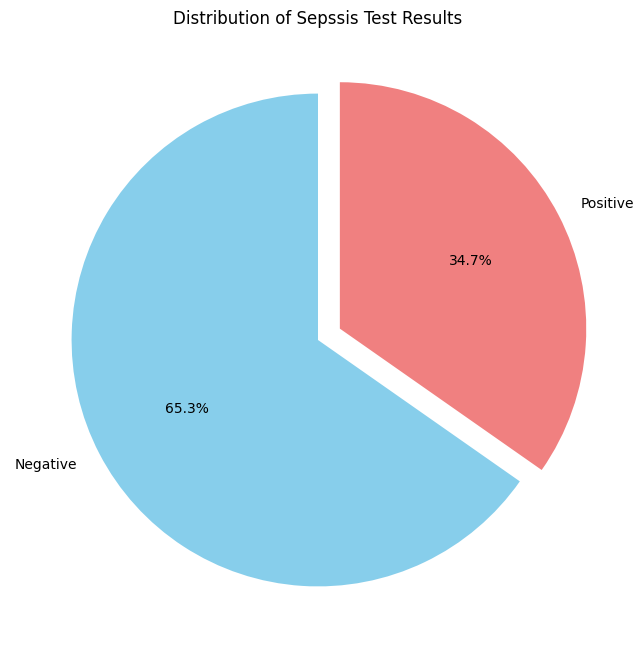

Number of patients tested Negative for Sepsis: 391
Number of patients tested Positive for Sepsis: 208


In [42]:
# Count the number of positive and negative cases
sepsis_counts = train['Sepssis'].value_counts()

# Create a pie chart
labels = ['Negative', 'Positive']
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # Explode the 'Positive' slice for emphasis

plt.figure(figsize=(8, 8))
plt.pie(sepsis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Sepssis Test Results')
plt.show()

# Print the counts
print("Number of patients tested Negative for Sepsis:", sepsis_counts['Negative'])
print("Number of patients tested Positive for Sepsis:", sepsis_counts['Positive'])

**Bivariate Analysis:**

**2. Is there a significant correlation between patients' age and the plasma glucose levels (PRG) with patients that tested positive to Sepssis?**

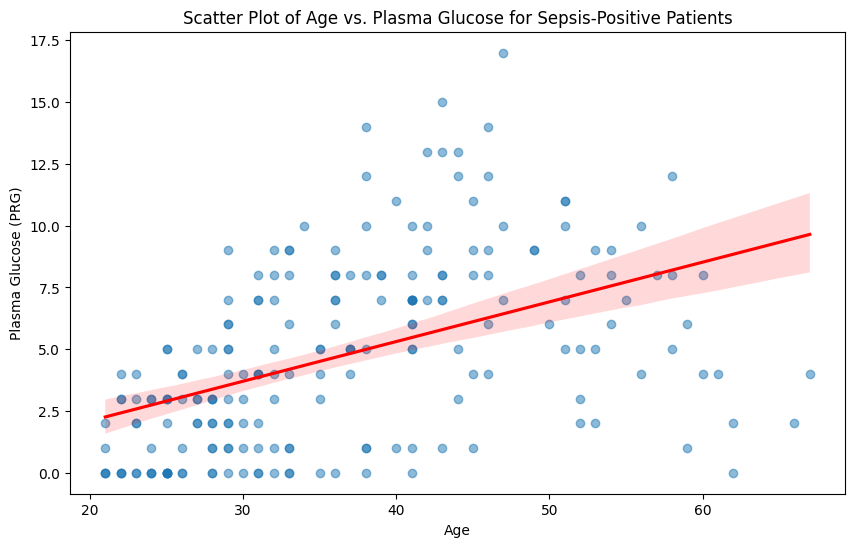

In [60]:
# Filter data for patients with positive sepsis test results
sepsis_positive_data = train[train['Sepssis'] == 'Positive']

# Scatter plot with regression line for patients with positive sepsis results
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x='Age', y='PRG', data=sepsis_positive_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Customizing legend labels
#scatter_plot.legend(title='Legend', loc='upper left')

plt.title('Scatter Plot of Age vs. Plasma Glucose for Sepsis-Positive Patients')
plt.xlabel('Age')
plt.ylabel('Plasma Glucose (PRG)')
plt.show()